In [1]:
import pandas as pd
import numpy as np
import stumpy as sp
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

## Group by Date

In [2]:
data=pd.read_csv('user1.csv',index_col=0)
data['date'] = pd.to_datetime(data['date_'])
data=data.set_index(data['date'],drop=True)
data.head()

,activity,date_,id,date
date,,,,
2010-01-02,Connect,2010-01-02,7,2010-01-02
2010-01-04,Connect,2010-01-04,9,2010-01-04
2010-01-05,Connect,2010-01-05,7,2010-01-05
2010-01-06,Connect,2010-01-06,7,2010-01-06
2010-01-07,Connect,2010-01-07,9,2010-01-07


In [3]:
data=data.drop(['date_','date'],axis=1)

In [4]:
data['freq']=data['id']
data=data.drop('id',axis=1)

In [5]:
data.head()


,activity,freq
date,,
2010-01-02,Connect,7
2010-01-04,Connect,9
2010-01-05,Connect,7
2010-01-06,Connect,7
2010-01-07,Connect,9


In [6]:
data['freq']=data['freq'].astype(np.float64)

In [7]:
smp=sp.stump(data['freq'].values,30)

In [8]:
smp

array([[1.4828274373238686, 302, -1, 302],
       [1.5030902298481368, 303, -1, 303],
       [1.524422320987025, 304, -1, 304],
       ...,
       [1.2161722856220514, 270, 270, -1],
       [1.2161722856220514, 271, 271, -1],
       [1.2243315984678325, 272, 272, -1]], dtype=object)

In [9]:
mp=np.argsort(smp[:,0])#return sorted indices 

In [10]:
smp[:,0]

array([1.4828274373238686, 1.5030902298481368, 1.524422320987025,
       1.4493697960504186, 1.4649872328563271, 1.4917006137663849,
       1.5275690151559405, 1.5745611935972825, 1.6412026622268043,
       1.1724318696646887, 1.0284224527294796, 1.0284224527294796,
       1.0284224527294796, 1.0308467669097507, 1.4474853073413414,
       1.4474853073413414, 1.8095451711181028, 1.7510955158814283,
       1.7510955158814283, 1.7448101775761744, 1.6958066673304146,
       1.6267653921221854, 1.6267653921221854, 1.621006586030004,
       1.6221995523504957, 1.5744126352751882, 1.2646111505747384,
       1.3039747938677302, 1.3023560844248654, 1.3023560844248654,
       1.3019517352056749, 1.3023560844248654, 1.3019517352056749,
       1.3463720239552612, 1.3441425403844598, 1.6232767228712852,
       1.6232767228712852, 1.6267653921221792, 1.6232767228712852,
       1.6386156055466876, 1.874208559834845, 1.8156125298119412,
       1.7978557621070954, 1.782688619853698, 1.5060067980896985,

In [11]:
mp

array([536, 537, 439, 137, 234, 235, 232, 233, 534, 535,  66, 530, 539,
       368, 369,  67, 237, 228, 236, 538, 231, 229, 531, 367, 533,  65,
       462, 464, 162, 161, 160, 155, 457, 463, 441, 440, 139, 138, 136,
       163, 465, 172, 438, 474, 154, 159, 158, 431, 173, 437, 156, 165,
       436, 456, 461, 460, 458, 467, 129, 135, 134, 475, 442, 174, 459,
       476, 400, 466, 157, 453, 140, 455, 151, 153,  98, 164, 168, 178,
       177, 479, 480, 532, 470, 230, 472, 471, 171, 170, 169, 473, 469,
       452, 478, 150, 166, 477, 468, 432, 433, 175, 176, 132, 434, 130,
       131, 167, 141, 152, 443, 454, 435, 133, 447, 145, 444, 142, 449,
       450, 451, 147, 148, 149, 143, 445, 146, 446, 448, 144, 383,  81,
       382,  80,  88, 390, 381,  79,  89, 391,  78, 380, 384,  82,  87,
       389,  83, 385,  84, 386, 392, 394,  90,  91,  92, 393, 379,  77,
        75, 377, 387, 373, 372,  64,  71,  85,  86, 388, 366,  70,  76,
       378,  63, 365,  72,  69,  74, 370,  68, 371, 374, 376, 41

In [12]:
motifs=[]
for i in range(5):
    motif=np.argsort(smp[:,0])[i]#smp[first_row:last_row,column_no]
    motifs.append(motif)

In [13]:
motifs

[536, 537, 439, 137, 234]

In [14]:
neighbors=[]
for motif in motifs:
    neighbors.append(smp[motif,1])

In [15]:
neighbors

[234, 235, 137, 439, 536]

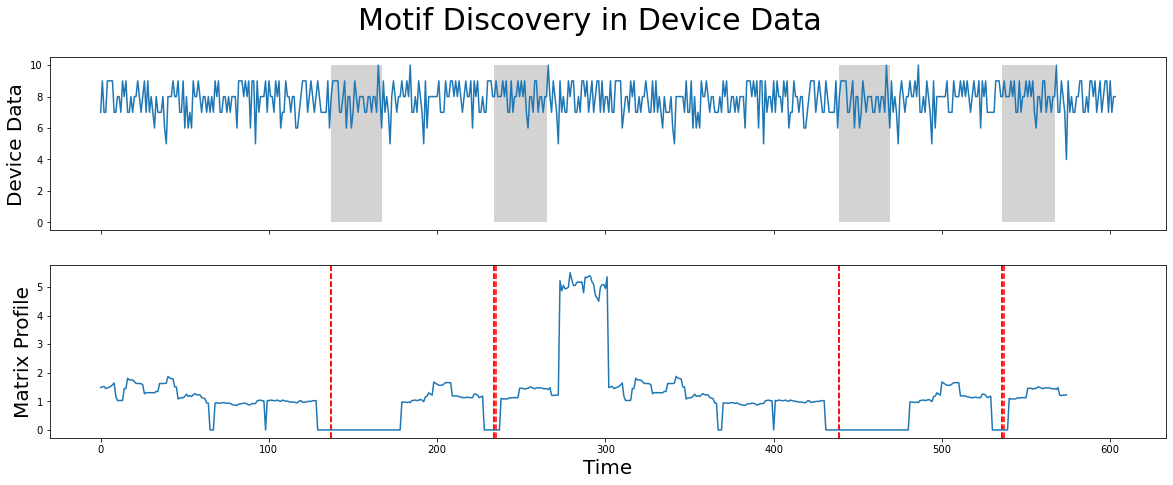

In [16]:
fig, axes=plt.subplots(2,figsize=(20,7),sharex=True)
fig.suptitle('Motif Discovery in Device Data', fontsize=30)
axes[0].plot(data['freq'].values)
axes[0].set_ylabel('Device Data',fontsize=20)
axes[1].set_ylabel('Matrix Profile',fontsize=20)
axes[1].set_xlabel('Time',fontsize=20)



for i in range(5):
    rect = Rectangle((motifs[i], 0), 30, 10, facecolor='lightgrey')
    axes[0].add_patch(rect)
    rect = Rectangle((neighbors[i], 0), 30, 10, facecolor='lightgrey')
    axes[0].add_patch(rect)
    axes[1].axvline(x=motifs[i], linestyle="dashed",color='red')
    axes[1].axvline(x=neighbors[i], linestyle="dashed",color='red')
    
axes[1].plot(smp[:, 0])
plt.savefig('motif.png')

# axes[1].plot(smp[:,0])

In [17]:
discords=[]
for i in range(1,6):
    discord=np.argsort(smp[:,0])[-i]#smp[first_row:last_row,column_no]
    discords.append(discord)
# i=0 
# np.argsort(smp[:,0])[-i]

In [18]:
discords

[279, 291, 290, 301, 288]

In [19]:
# d_neighbors=[]
# for discord in discord:
#     d_neighbors.append(smp[discord,1])
smp[discords,1]

array([146, 215, 214, 133, 231], dtype=object)

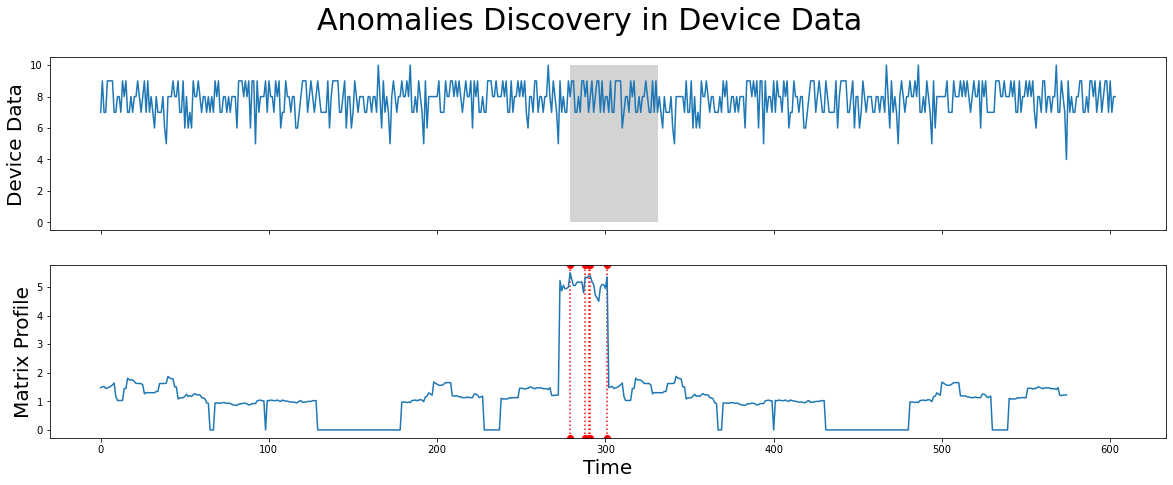

In [20]:
fig2, axes=plt.subplots(2,figsize=(20,7),sharex=True)
fig2.suptitle('Anomalies Discovery in Device Data', fontsize=30)
axes[0].plot(data['freq'].values)
axes[0].set_ylabel('Device Data',fontsize=20)
axes[1].set_ylabel('Matrix Profile',fontsize=20)
axes[1].set_xlabel('Time',fontsize=20)



for i in range(5):
    rect = Rectangle((discords[i], 0), 30, 10, facecolor='lightgrey')
    axes[0].add_patch(rect)
    
    axes[1].axvline(x=discords[i],linestyle="dotted",color='red',marker='o') 
axes[1].plot(smp[:, 0])
plt.show()

## Group by Time

In [21]:
data_hour=pd.read_csv('user1_device_hour.csv',index_col=0)
# hour['hour']=hour['date']
# hour.drop('date',axis=1)
# hour['date']=hour['level_0']
# hour.drop('level_0',axis=1,inplace=True)
# hour.to_csv('user1_device_hour.csv')
data_hour

data_hour=data_hour.set_index(['date_','hour']).sort_index()
# data_hour.reset_index()

data_hour

freq
date_      hour      
2010-01-02 7        2
           8        2
           9        4
           10       2
           12       1
...               ...
2011-01-13 10       3
           11       1
           13       2
           14       3
           15       1

[2063 rows x 1 columns]

In [52]:
# plt.figure=figsize(20,7)
# plt.plot(data_hour['freq'].values)

In [22]:
data_hour['freq']=data_hour['freq'].astype(np.float64)

In [23]:
m=8*7
smp=sp.stump(data_hour['freq'].values,m)

In [24]:
smp

array([[6.611746017263899, 1095, -1, 1095],
       [6.581443670016047, 1096, -1, 1096],
       [6.580650467900861, 1097, -1, 1097],
       ...,
       [6.478645247331748, 828, 828, -1],
       [6.565987119434754, 1167, 1167, -1],
       [6.541731534955297, 1168, 1168, -1]], dtype=object)

In [25]:
mp=np.argsort(smp[:,0])#return sorted indices 

In [26]:
smp[:,0]

array([6.611746017263899, 6.581443670016047, 6.580650467900861, ...,
       6.478645247331748, 6.565987119434754, 6.541731534955297],
      dtype=object)

In [27]:
mp

array([ 337, 1142, 1143, ..., 1321, 1322, 1323], dtype=int64)

In [28]:
motifs=[]
for i in range(5):
    motif=np.argsort(smp[:,0])[i]#smp[first_row:last_row,column_no]
    motifs.append(motif)

In [29]:
motifs

[337, 1142, 1143, 338, 1130]

In [30]:
neighbors=[]
for motif in motifs:
    neighbors.append(smp[motif,1])

In [31]:
neighbors

[1142, 337, 338, 1143, 325]

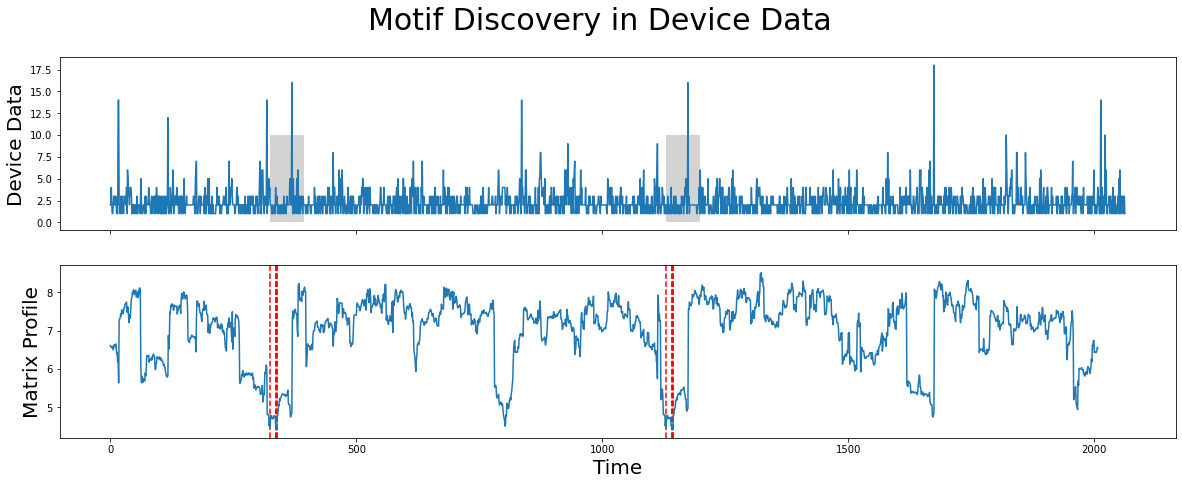

In [50]:
fig, axes=plt.subplots(2,figsize=(20,7),sharex=True)
fig.suptitle('Motif Discovery in Device Data', fontsize=30)
axes[0].plot(data_hour['freq'].values)
axes[0].set_ylabel('Device Data',fontsize=20)
axes[1].set_ylabel('Matrix Profile',fontsize=20)
axes[1].set_xlabel('Time',fontsize=20)



for i in range(5):
    rect = Rectangle((motifs[i], 0), m, 10, facecolor='lightgrey')
    axes[0].add_patch(rect)
    rect = Rectangle((neighbors[i], 0), m, 10, facecolor='lightgrey')
    axes[0].add_patch(rect)
    axes[1].axvline(x=motifs[i], linestyle="dashed",color='red')
    axes[1].axvline(x=neighbors[i], linestyle="dashed",color='red')
    
axes[1].plot(smp[:, 0])
plt.show()

# axes[1].plot(smp[:,0])

In [33]:
discords=[]
for i in range(1,6):
    discord=np.argsort(smp[:,0])[-i]#smp[first_row:last_row,column_no]
    discords.append(discord)
# i=0 
# np.argsort(smp[:,0])[-i]

In [34]:
discords

[1323, 1322, 1321, 1325, 1326]

In [35]:
# d_neighbors=[]
# for discord in discord:
#     d_neighbors.append(smp[discord,1])
# smp[discords,1]

1323
1322
1321
1325
1326


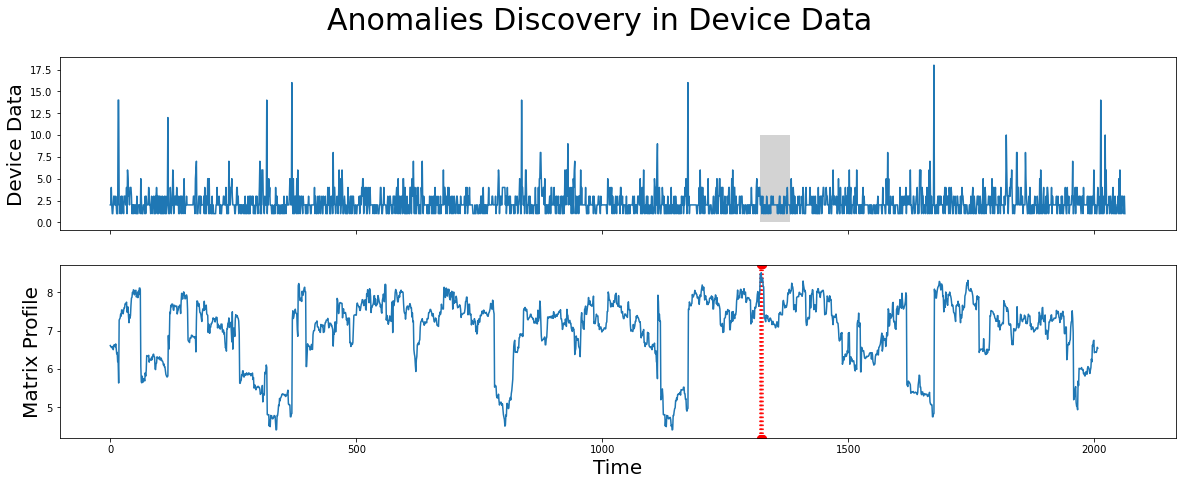

In [51]:
fig2, axes=plt.subplots(2,figsize=(20,7),sharex=True)
fig2.suptitle('Anomalies Discovery in Device Data', fontsize=30)
axes[0].plot(data_hour['freq'].values)
axes[0].set_ylabel('Device Data',fontsize=20)
axes[1].set_ylabel('Matrix Profile',fontsize=20)
axes[1].set_xlabel('Time',fontsize=20)


color=['red','yellow','black']
for i in range(5):
    print(discords[i])
    rect = Rectangle((discords[i], 0), m, 10, facecolor='lightgrey')
    axes[0].add_patch(rect)
    
    axes[1].axvline(x=discords[i],linestyle="dotted",color='red',marker='o') 
    
axes[1].plot(smp[:, 0])
plt.show()

In [37]:
import matrixprofile as mp

In [38]:
mph=mp.compute(data_hour['freq'].values,8*7)

[<Figure size 1080x504 with 2 Axes>]

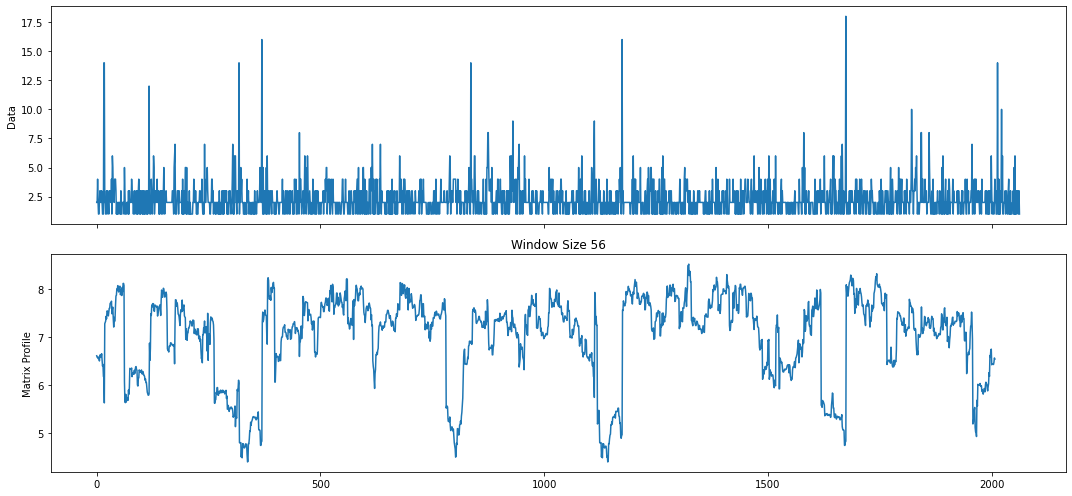

In [39]:
mp.visualize(mph)

[<Figure size 1080x504 with 2 Axes>,
 <Figure size 1080x504 with 6 Axes>,
 <Figure size 1080x504 with 3 Axes>]

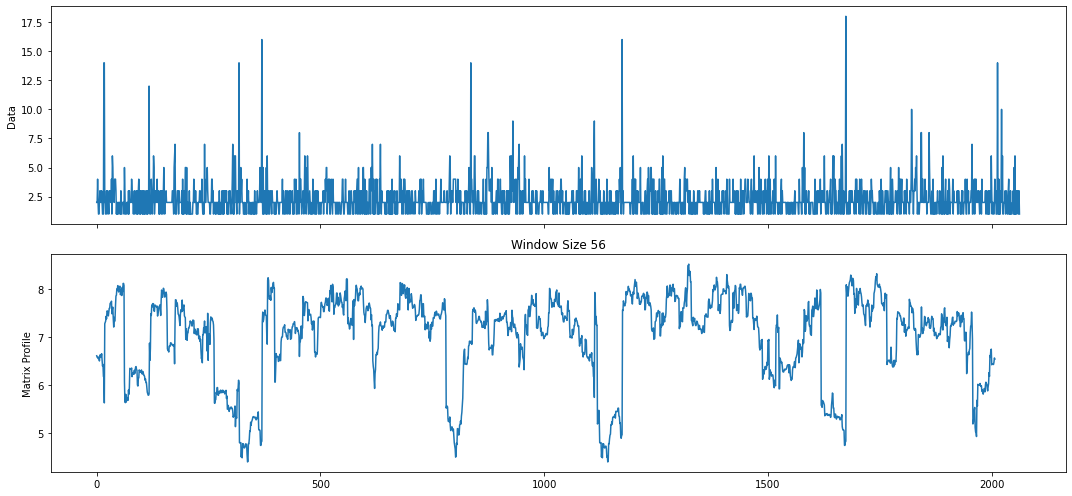

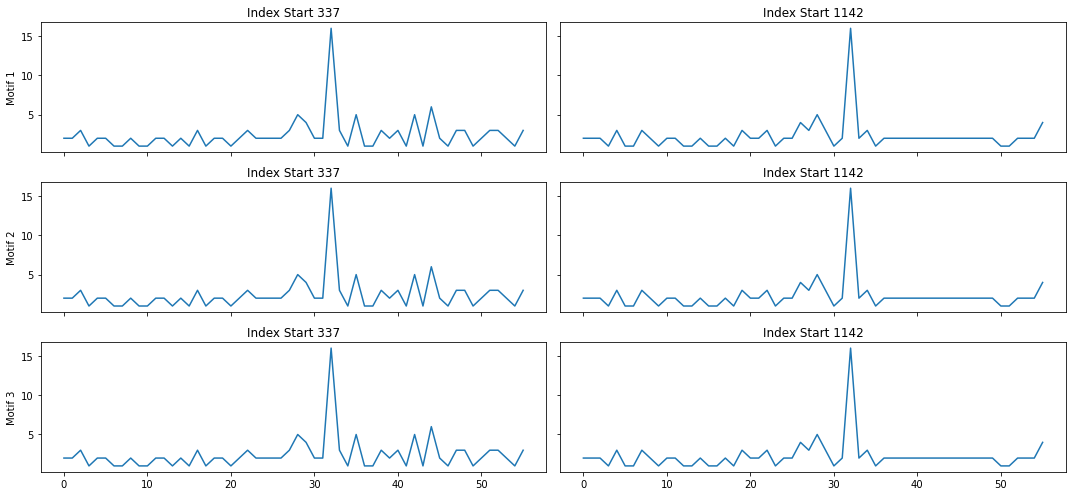

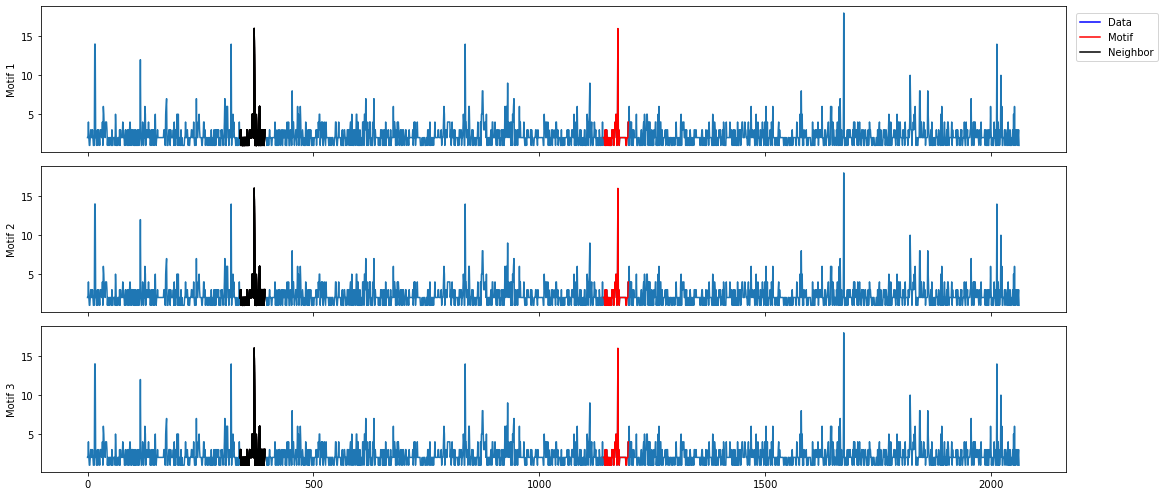

In [40]:
mp.visualize(mp.discover.motifs(mph))

C:\Users\Kinza\anaconda3\lib\site-packages\matrixprofile\visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


[<Figure size 1080x504 with 2 Axes>,
 <Figure size 1080x504 with 6 Axes>,
 <Figure size 1080x504 with 3 Axes>,
 <Figure size 1080x504 with 4 Axes>]

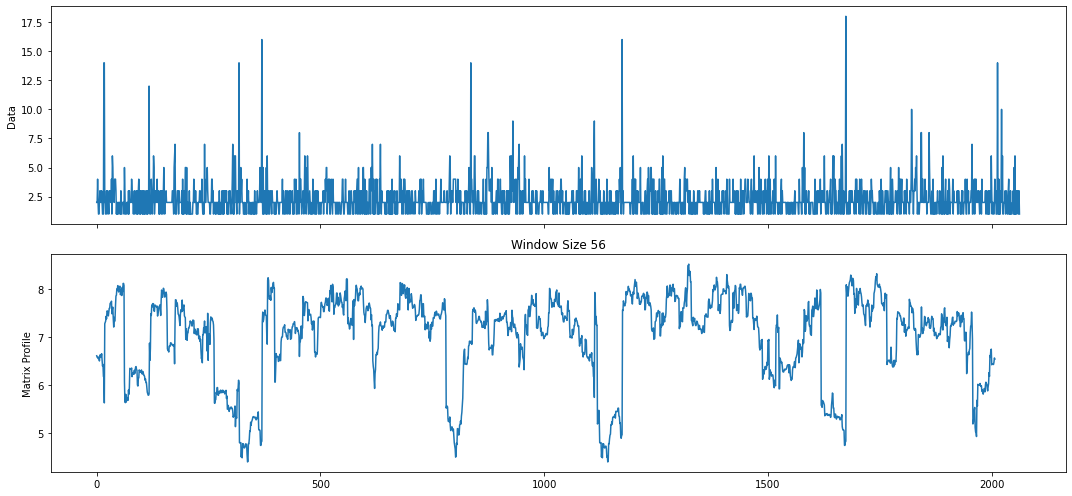

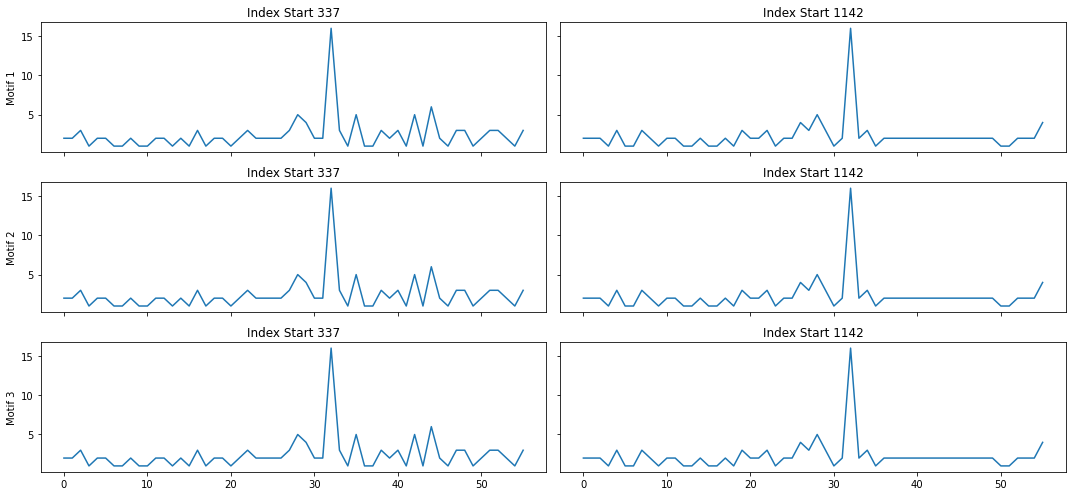

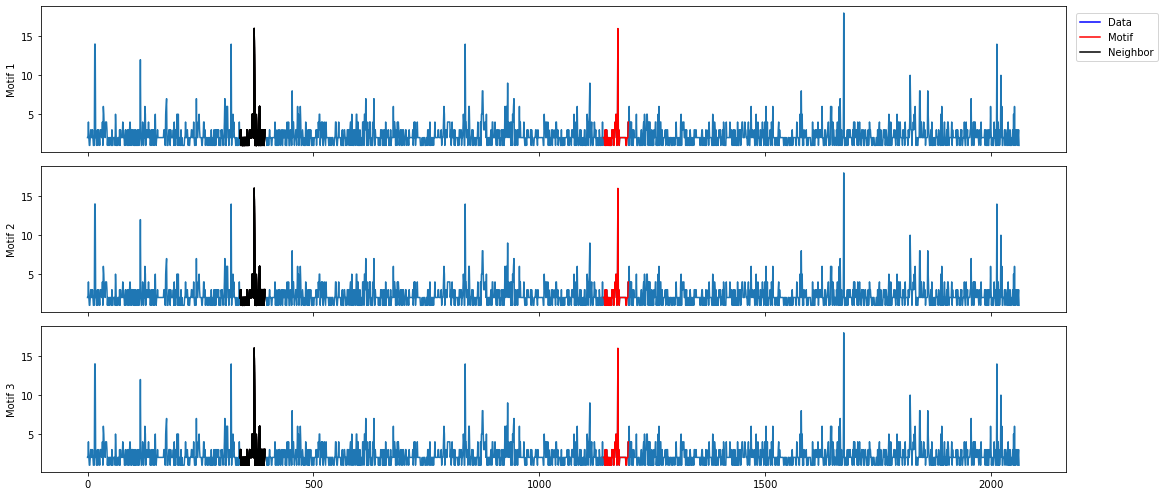

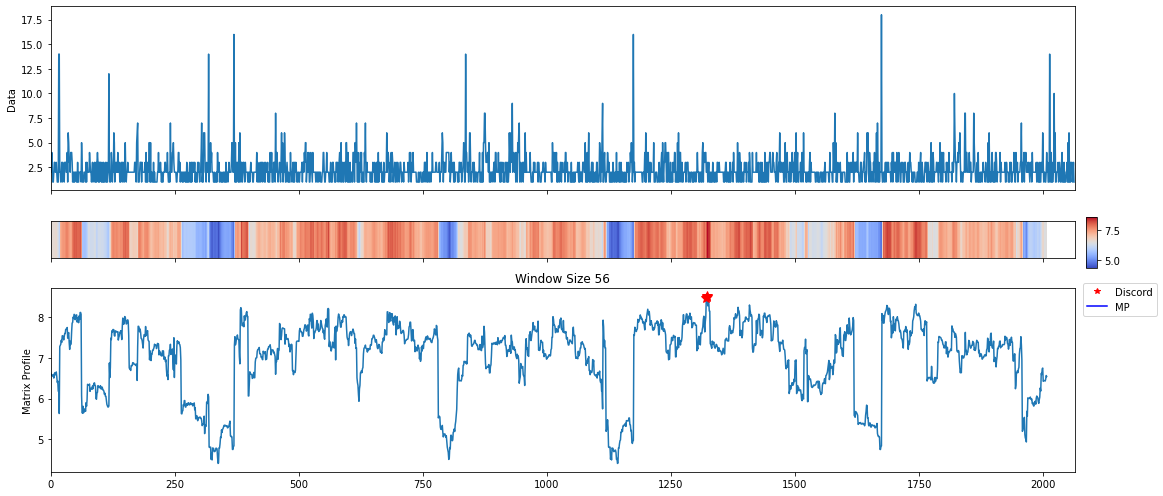

In [41]:
mp.visualize(mp.discover.discords(mph))

C:\Users\Kinza\anaconda3\lib\site-packages\matrixprofile\visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
C:\Users\Kinza\anaconda3\lib\site-packages\matrixprofile\visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
C:\Users\Kinza\anaconda3\lib\site-packages\matrixprofile\visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


({'pmp': array([[1.2818533 , 1.49311505, 1.14998387, ...,        inf,        inf,
                 inf],
         [1.65206895, 1.60160149, 1.37314233, ...,        inf,        inf,
                 inf],
         [1.77331367, 1.77331367, 1.67989582, ...,        inf,        inf,
                 inf],
         ...,
         [2.66307174, 1.42632877, 1.74783035, ...,        inf,        inf,
                 inf],
         [1.46754722, 1.79406323, 2.25187874, ...,        inf,        inf,
                 inf],
         [1.83924372, 2.32430002, 2.31136486, ...,        inf,        inf,
                 inf]]),
  'pmpi': array([[        115,        1083,         241, ..., -2147483648,
          -2147483648, -2147483648],
         [        115,        1890,         241, ..., -2147483648,
          -2147483648, -2147483648],
         [        115,         116,         175, ..., -2147483648,
          -2147483648, -2147483648],
         ...,
         [        239,        1998,         159, ..., -

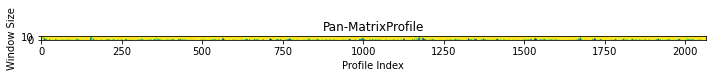

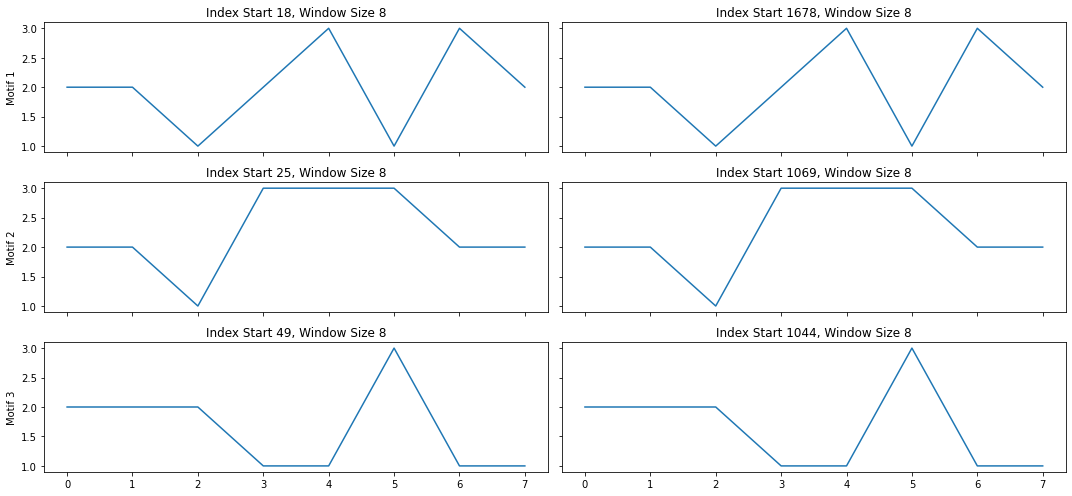

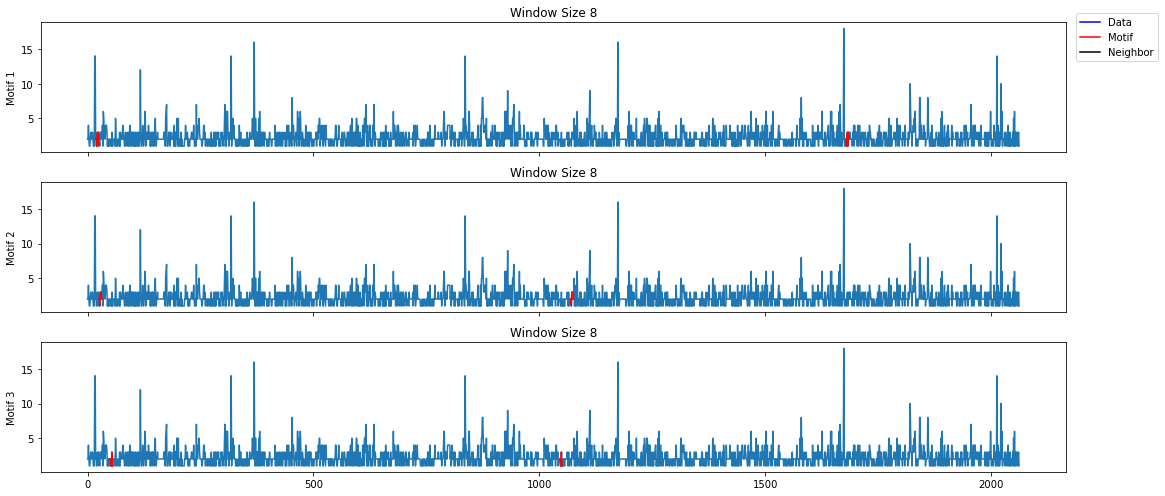

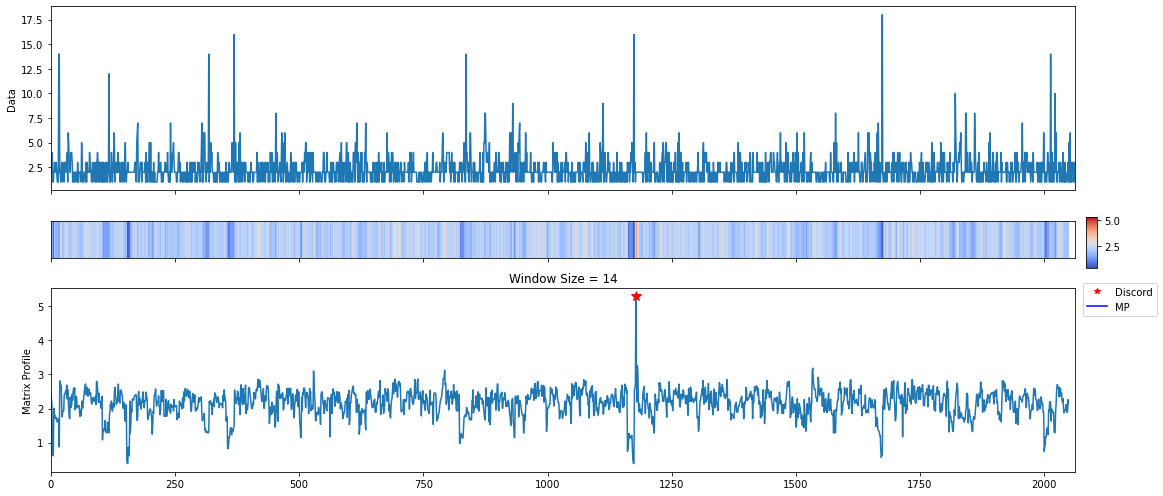

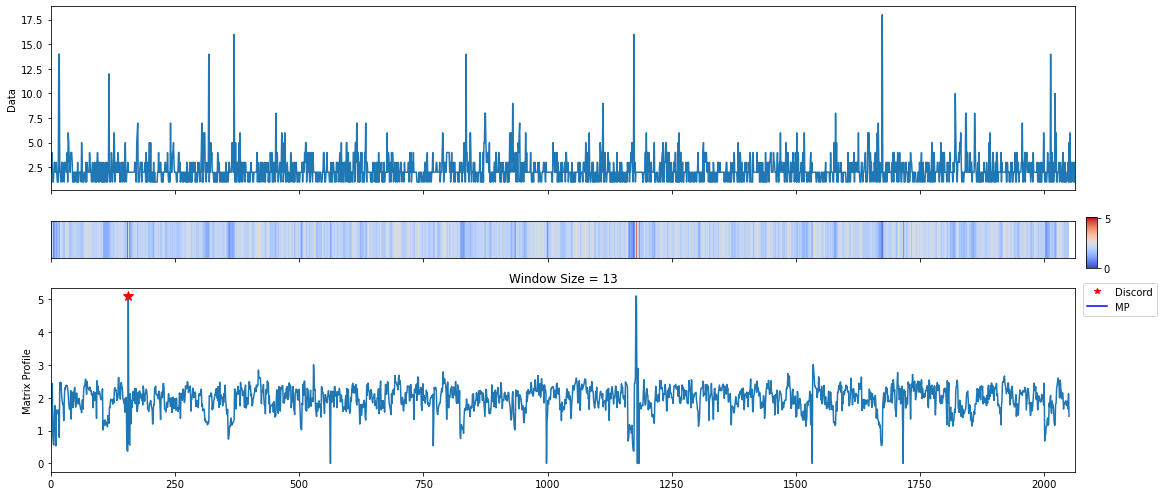

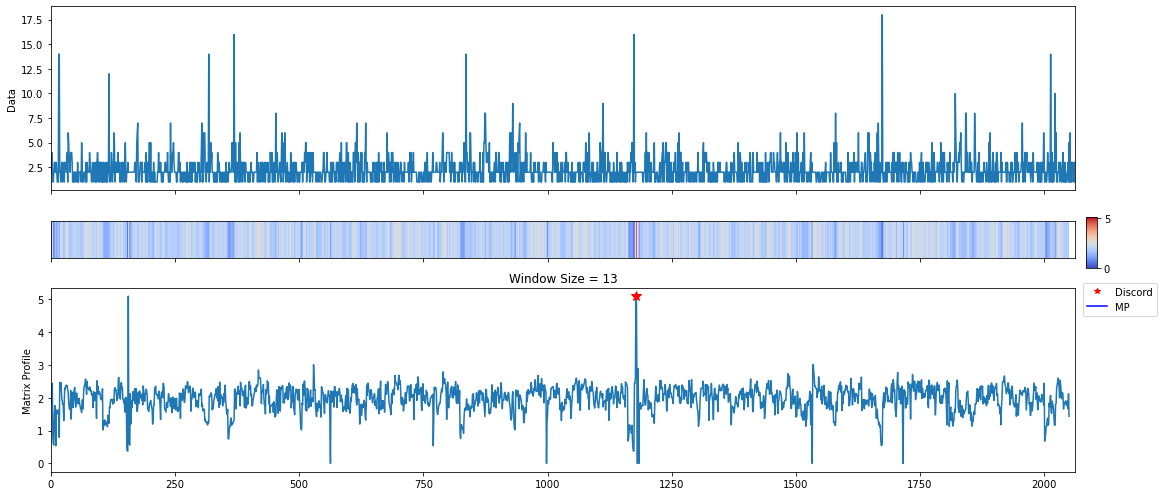

In [42]:
mp.analyze(data_hour['freq'].values)